# Library

In [1]:
import sys, os
import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.size'] = 12


In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios


/data/nriemer/c/yicenl2/git/project/partmc/scenarios


# Bulk organic mass

In [8]:
directory = 'sce_completed/scenarios'
bulk_poa_masses = np.zeros((100,25))
bulk_soa_masses = np.zeros((100,25))

#Bulk properties
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce_ind = int(filename[-30:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            bulk_poa_masses[sce_ind, :] = ncf.variables["bulk_poa_maases"].data * 1e9
            bulk_soa_masses[sce_ind, :] = ncf.variables["bulk_soa_maases"].data * 1e9

d = {"bulk_poa_masses": bulk_poa_masses[:,:].ravel(),
     "bulk_soa_masses": bulk_soa_masses[:,:].ravel()}
df = pd.DataFrame(data=d)
print(df.count())


bulk_poa_masses    2500
bulk_soa_masses    2500
dtype: int64


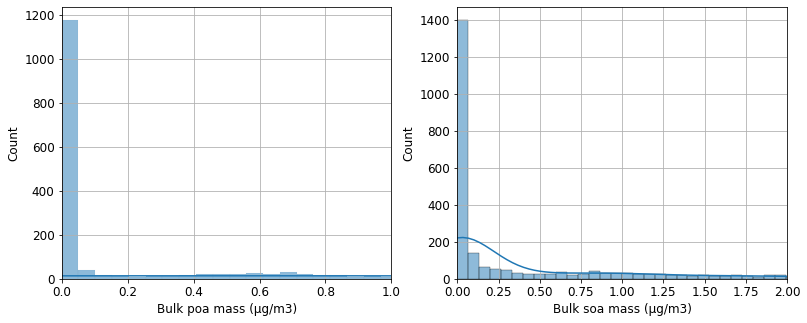

In [6]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
# ax1 = sns.histplot(df["bulk_poa_masses"])
ax1 = sns.histplot(data = df, x = "bulk_poa_masses", bins = 2500, kde=True)
# ax1 = sns.histplot(data = df.bulk_poa_masses, kde=True)
ax1.set_xlabel('Bulk poa mass (µg/m3)')
ax1.set_xlim(0,1)
ax1.set_ylabel('Count')
ax1.grid()

plt.subplot(1,2,2)
ax2 = sns.histplot(data = df, x = "bulk_soa_masses", bins = 100, kde=True)
ax2.set_xlabel('Bulk soa mass (µg/m3)')
ax2.set_ylabel('Count')
ax2.set_xlim(0,2)
ax2.grid()


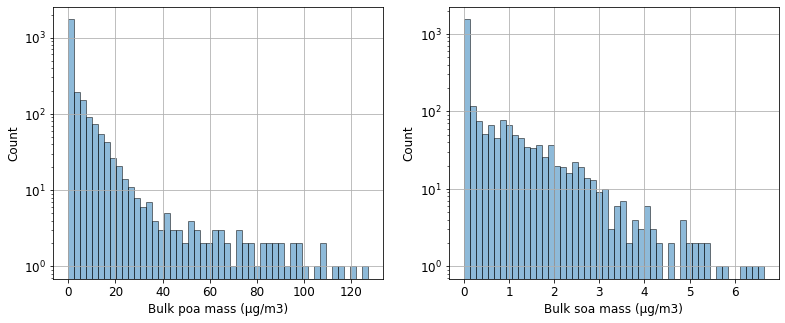

In [11]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.hist(data = df, x = "bulk_poa_masses", bins = 50, edgecolor= 'k', alpha=0.5)
plt.xlabel('Bulk poa mass (µg/m3)')
plt.yscale('LOG')
plt.ylabel('Count')
plt.grid()

plt.subplot(1,2,2)
plt.hist(data = df, x = "bulk_soa_masses", bins = 50, edgecolor= 'k', alpha=0.5)
plt.xlabel('Bulk soa mass (µg/m3)')
plt.yscale('LOG')
plt.ylabel('Count')
plt.grid()


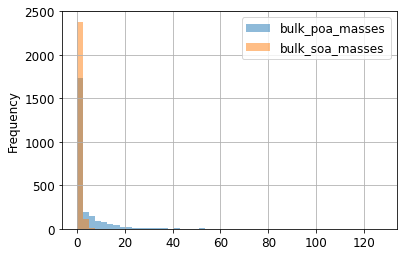

In [6]:
df.plot.hist(bins=50, alpha=0.5)
plt.grid()